In [1]:
!pip install seaborn
!pip install sklearn
!pip install matplotlib

In [2]:
# Importing Header Files
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
#Loading Data
dataset = pd.read_csv('insurance.csv')

In [4]:
# Printing keys
print(dataset.keys())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [5]:
#First 10 data 
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
#Last 10 data 
dataset.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [7]:
# Replacing string values to numbers
dataset['sex'] = dataset['sex'].apply({'male':0,'female':1}.get) 
dataset['smoker'] = dataset['smoker'].apply({'yes':1, 'no':0}.get)
dataset['region'] = dataset['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [8]:
#First 10 data 
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,4,6406.41070
9,60,1,25.840,0,0,3,28923.13692


In [9]:
#Last 10 data 
dataset.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,1,24.225,2,0,4,22395.74424
1329,52,0,38.600,2,0,1,10325.20600
1330,57,1,25.740,2,0,2,12629.16560
1331,23,1,33.400,0,0,1,10795.93733
1332,52,1,44.700,3,0,1,11411.68500
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500
1337,61,1,29.070,0,1,3,29141.36030


In [10]:
# Checking for NULL values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

c:\users\prashant mishra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


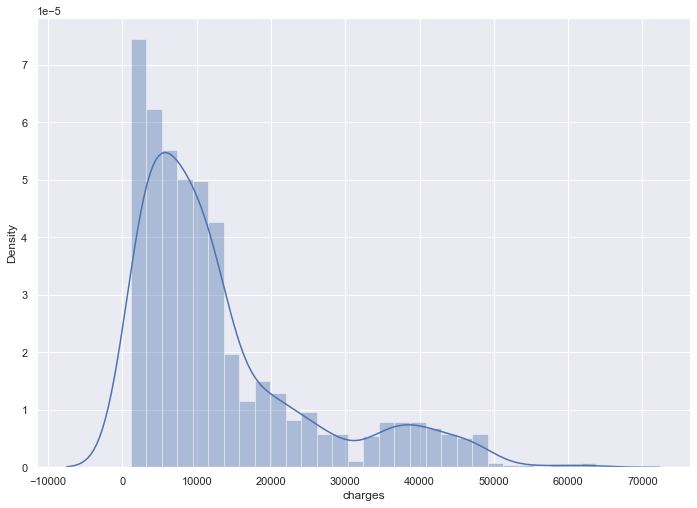

In [11]:
# EDA
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['charges'], bins=30)
plt.show()

<AxesSubplot:>

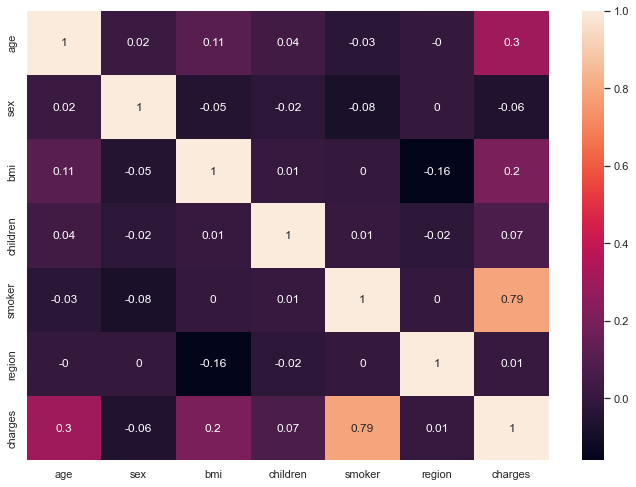

In [12]:
# Correlation Matrix
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

There is really good relation between smoker and charges. So we will go with that.

In [13]:
# features
X = dataset[['age','sex','bmi','children','smoker','region']]

# predicted variable
Y = dataset['charges']

In [14]:
#Values in our X
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [15]:
#Values in our y
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
# Splitting the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(896, 6)
(442, 6)
(896,)
(442,)


In [17]:
# Building the Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [18]:
# Model Evaluation

y_train_predict = lin_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
rmse = (np.sqrt(mse))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set:

MSE is 36670720.942923464
RMSE is 6055.635469785435
R2 score is 0.7369587975707715




In [19]:
# Predict charges for new customer : Name- prashant
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 45.50,
        'children' : 4,
        'smoker' : 1,
        'region' : 3}

index = [1]
prashant_df = pd.DataFrame(data,index)
print(prashant_df.head())

prediction_prashant = lin_model.predict(prashant_df)
print("\n\nMedical Insurance cost for prashant is : ",prediction_prashant)

   age  sex   bmi  children  smoker  region
1   40    1  45.5         4       1       3


Medical Insurance cost for prashant is :  [38399.25421277]
